In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from ipywidgets import interact, IntSlider
from scipy import constants

# Parameters
num_particles = int(1E4)  # Number of particles
num_time_steps = int(1e3)  # Number of time steps (turns)
velocity = 0.1  # Velocity constant
sigma = 0.1  # Standard deviation of the Wiener process
time_step_size = 0.01  # Time step size

# Initialization
positions = np.zeros((num_particles, num_time_steps))  # Matrix to store paths
random_numbers = np.random.randn(num_particles, num_time_steps)  # Random normal numbers for Wiener process increments

for time_step in tqdm(range(1, num_time_steps), desc="Simulations"):
    previous_positions = positions[:, time_step - 1]
    velocity_component = -1 * (previous_positions < 0) * (np.abs(previous_positions) < 0.25) * velocity
    positions[:, time_step] = previous_positions + velocity_component * time_step_size + np.sqrt(time_step_size) * sigma * random_numbers[:, time_step]

# Function to plot histogram with a given time step
def plot_histogram(selected_time_step):
    plt.figure(figsize=(10, 6))
    plt.hist(positions[:, selected_time_step], bins=50, alpha=0.7, color='blue')
    plt.xlabel('Positions')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Positions at time step {selected_time_step}')
    plt.grid(True)
    plt.show()

# Slider to select time step
time_slider = IntSlider(min=0, max=num_time_steps-1, step=1, value=num_time_steps-1, description='Time Step')

# Interactive plot
interact(plot_histogram, selected_time_step=time_slider)


Simulations: 100%|██████████| 999/999 [00:00<00:00, 3353.70it/s]


interactive(children=(IntSlider(value=999, description='Time Step', max=999), Output()), _dom_classes=('widget…

<function __main__.plot_histogram(selected_time_step)>

scan over noise sigma

 10%|█         | 1/10 [00:00<00:05,  1.75it/s]

Maximum bin height at the last time step for sigma=0.05: 1638


 20%|██        | 2/10 [00:01<00:04,  1.72it/s]

Maximum bin height at the last time step for sigma=0.10: 1373


 30%|███       | 3/10 [00:01<00:04,  1.73it/s]

Maximum bin height at the last time step for sigma=0.15: 925


 40%|████      | 4/10 [00:02<00:03,  1.74it/s]

Maximum bin height at the last time step for sigma=0.20: 1006


 50%|█████     | 5/10 [00:02<00:02,  1.76it/s]

Maximum bin height at the last time step for sigma=0.25: 711


 60%|██████    | 6/10 [00:03<00:02,  1.78it/s]

Maximum bin height at the last time step for sigma=0.30: 738


 70%|███████   | 7/10 [00:03<00:01,  1.78it/s]

Maximum bin height at the last time step for sigma=0.35: 662


 80%|████████  | 8/10 [00:04<00:01,  1.79it/s]

Maximum bin height at the last time step for sigma=0.40: 714


 90%|█████████ | 9/10 [00:05<00:00,  1.79it/s]

Maximum bin height at the last time step for sigma=0.45: 680


100%|██████████| 10/10 [00:05<00:00,  1.77it/s]

Maximum bin height at the last time step for sigma=0.50: 630


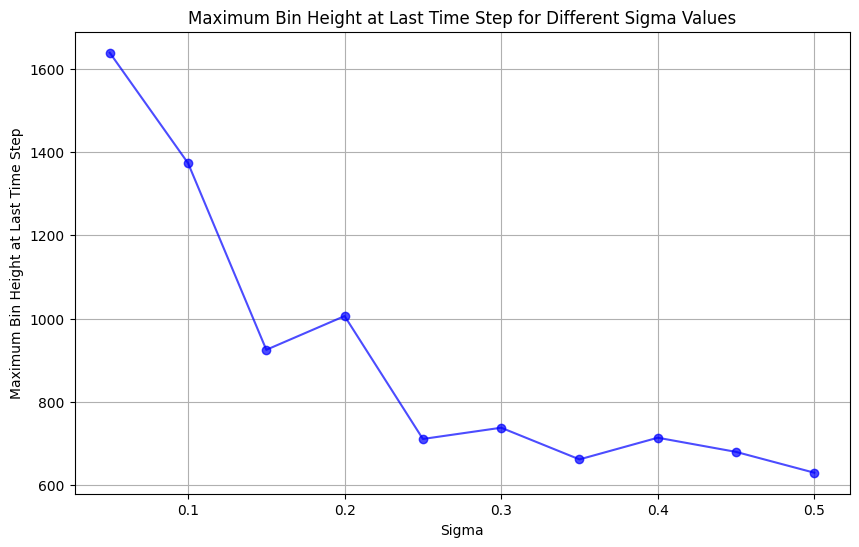

In [14]:
sigma_values = np.linspace(0.05, 0.5, 10)  # Adjust the range and number of values as needed
max_bin_heights = []

for sigma in tqdm(sigma_values):
    # Initialization
    positions = np.zeros((num_particles, num_time_steps))  # Matrix to store paths
    random_numbers = np.random.randn(num_particles, num_time_steps)  # Random normal numbers for Wiener process increments

    # Vectorized Simulation Loop
    for time_step in range(1, num_time_steps):
        previous_positions = positions[:, time_step - 1]
        velocity_component = -1 * (previous_positions < 0) * (np.abs(previous_positions) < 0.25) * velocity
        positions[:, time_step] = previous_positions + velocity_component * time_step_size + np.sqrt(time_step_size) * sigma * random_numbers[:, time_step]

    # Compute the highest bin height for the last time step
    last_time_step = num_time_steps - 1
    hist, bins = np.histogram(positions[:, last_time_step], bins=50)
    max_bin_height_last_time_step = np.max(hist)
    max_bin_heights.append(max_bin_height_last_time_step)

    # Print the maximum bin height at the last time step for the current sigma
    print(f"Maximum bin height at the last time step for sigma={sigma:.2f}: {max_bin_height_last_time_step}")

# Plot the maximum bin heights for different sigma values
plt.figure(figsize=(10, 6))
plt.plot(sigma_values, max_bin_heights, marker='o', alpha=0.7, color='blue')
plt.xlabel('Sigma')
plt.ylabel('Maximum Bin Height at Last Time Step')
plt.title('Maximum Bin Height at Last Time Step for Different Sigma Values')
plt.grid(True)
plt.show()

In [33]:
# import numpy as np
# import matplotlib.pyplot as plt
# from tqdm import tqdm
# from ipywidgets import interact, IntSlider

# # Parameters
# num_particles = int(1E4)  # Number of particles
# num_time_steps = int(1E3)  # Number of time steps (turns)
# time_step_size = 0.01  # Time step size
# drift_area = 0.25  # Fixed drift area

# # Range of sigma and velocity values to scan
# sigma_values = np.linspace(0.05, 0.5, 10)  
# velocity_values = np.linspace(0.05, 0.5, 10)  

# # sigma_values = [0.1]
# # velocity_values = [0.1]

# #positions0 = np.random.uniform(-0.5, 0.5, (num_particles, num_time_steps))  # Initial positions uniformly distributed in [-0.5, 0.5]

# positions0 = np.zeros((num_particles, num_time_steps))  # Matrix to store paths
# positions0[:, 0] = np.random.uniform(-1, 1, num_particles)  # Initial positions uniformly distributed in [-0.5, 0.5]

# # Initialize a matrix to store the maximum bin heights for each combination of sigma and velocity
# max_bin_heights = np.zeros((len(sigma_values), len(velocity_values)))

# # Perform the scan
# for sigma_index, sigma in enumerate(tqdm(sigma_values, desc="Sigma values")):
#     for velocity_index, velocity in enumerate(tqdm(velocity_values, desc=f"Velocity values for sigma={sigma:.2f}", leave=False)):
#         # Initialization
#         #positions = np.zeros((num_particles, num_time_steps))  # Matrix to store paths
#         positions = positions0.copy()
#         random_numbers = np.random.randn(num_particles, num_time_steps)  # Random normal numbers for Wiener process increments

#         # Vectorized Simulation Loop
#         for time_step in range(1, num_time_steps):
#             previous_positions = positions[:, time_step - 1]
#             velocity_component = -1 * (previous_positions < 0) * (np.abs(previous_positions) < drift_area) * velocity
#             positions[:, time_step] = previous_positions + velocity_component * time_step_size + np.sqrt(time_step_size) * sigma * random_numbers[:, time_step]

#         # Compute the highest bin height for the last time step
#         last_time_step = num_time_steps - 1
#         hist, bins = np.histogram(positions[:, last_time_step], bins=50)
#         max_bin_height_last_time_step = np.max(hist)
#         max_bin_heights[sigma_index, velocity_index] = max_bin_height_last_time_step

# # Plot the maximum bin heights as a heatmap
# plt.figure(figsize=(12, 8))
# plt.imshow(max_bin_heights, extent=[velocity_values[0], velocity_values[-1], sigma_values[0], sigma_values[-1]], origin='lower', aspect='auto', cmap='viridis')
# plt.colorbar(label='Maximum Bin Height at Last Time Step')
# plt.xlabel('Velocity')
# plt.ylabel('Sigma')
# plt.title('Maximum Bin Height at Last Time Step for Different Sigma and Velocity Values')
# plt.show()

# # Function to plot histogram with a given time step
# def plot_histogram(selected_time_step):
#     plt.figure(figsize=(10, 6))
#     plt.hist(positions[:, selected_time_step], bins=50, alpha=0.7, color='blue')
#     plt.xlabel('Positions')
#     plt.ylabel('Frequency')
#     plt.title(f'Histogram of Positions at time step {selected_time_step}')
#     plt.grid(True)
#     plt.show()

# # Slider to select time step
# time_slider = IntSlider(min=0, max=num_time_steps-1, step=1, value=num_time_steps-1, description='Time Step')

# # Interactive plot
# interact(plot_histogram, selected_time_step=time_slider)


Sigma values: 100%|██████████| 10/10 [00:51<00:00,  5.12s/it]


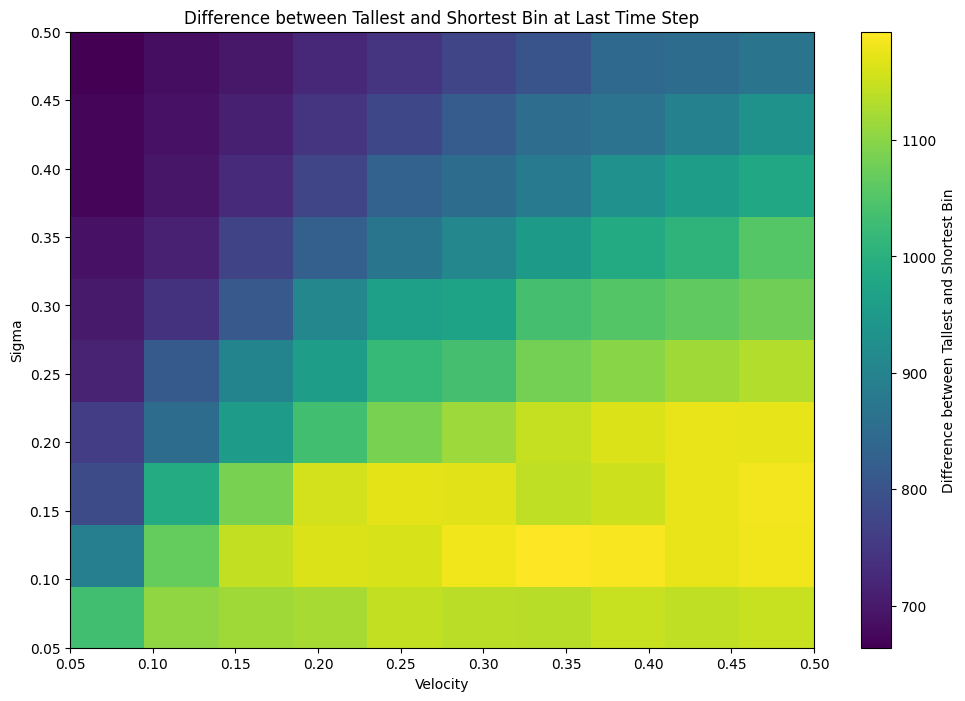

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def simulate_wiener_process(num_particles, num_time_steps, time_step_size, sigma, velocity, initial_range=(-0.5, 0.5)):
    positions = np.zeros((num_particles, num_time_steps))
    
    # Seed for initial positions
    np.random.seed(43)
    positions[:, 0] = np.random.uniform(initial_range[0], initial_range[1], num_particles)
    
    # Seed for Wiener process increments
    np.random.seed(42)
    random_numbers = np.random.randn(num_particles, num_time_steps)

    for time_step in range(1, num_time_steps):
        previous_positions = positions[:, time_step - 1]
        velocity_component = -1 * (previous_positions > 0) * (np.abs(previous_positions) < drift_area) * velocity
        positions[:, time_step] = (previous_positions + velocity_component * time_step_size +
                                   np.sqrt(time_step_size) * sigma * random_numbers[:, time_step])
    return positions

def calculate_bin_diff(positions, time_step_index):
    hist, bins = np.histogram(positions[:, time_step_index], bins=50)
    return np.max(hist) - np.min(hist)

# Parameters
num_particles = int(1E4)  # Number of particles
num_time_steps = int(1E3)  # Number of time steps (turns)
time_step_size = 0.01  # Time step size
drift_area = 0.25  # Fixed drift area

# Range of sigma and velocity values to scan
sigma_values = np.linspace(0.05, 0.5, 10)  # Adjust the range and number of values as needed
velocity_values = np.linspace(0.05, 0.5, 10)  # Adjust the range and number of values as needed

# Index of the last time step
last_time_step_index = num_time_steps - 1

# Initialize a matrix to store the bin height differences for each combination of sigma and velocity
bin_diff = np.zeros((len(sigma_values), len(velocity_values)))

# Perform the scan
for sigma_index, sigma in enumerate(tqdm(sigma_values, desc="Sigma values")):
    for velocity_index, velocity in enumerate(velocity_values):
        # Simulate Wiener process
        positions = simulate_wiener_process(num_particles, num_time_steps, time_step_size, sigma, velocity)
        
        # Calculate the difference between the tallest and shortest bin at the last time step
        bin_diff[sigma_index, velocity_index] = calculate_bin_diff(positions, last_time_step_index)

# Plot the bin height differences as a heatmap
plt.figure(figsize=(12, 8))
plt.imshow(bin_diff, extent=[velocity_values[0], velocity_values[-1], sigma_values[0], sigma_values[-1]], origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='Difference between Tallest and Shortest Bin')
plt.xlabel('Velocity')
plt.ylabel('Sigma')
plt.title('Difference between Tallest and Shortest Bin at Last Time Step')
plt.show()


In [17]:
(np.abs(previous_positions) < drift_area)

array([False, False, False, ..., False, False, False])

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import ipywidgets as widgets

def simulate_wiener_process(num_particles, num_time_steps, time_step_size, sigma, velocity, drift_area=drift_area, initial_range=(-0.5, 0.5)):
    positions = np.zeros((num_particles, num_time_steps))
    
    # Seed for initial positions
    np.random.seed(43)
    positions[:, 0] = np.random.uniform(initial_range[0], initial_range[1], num_particles)
    
    # Seed for Wiener process increments
    np.random.seed(42)
    random_numbers = np.random.randn(num_particles, num_time_steps)

    for time_step in range(1, num_time_steps):
        previous_positions = positions[:, time_step - 1]
        velocity_component = -1 * (previous_positions > 0) * (np.abs(previous_positions) < drift_area) * velocity
        positions[:, time_step] = (previous_positions + velocity_component * time_step_size +
                                   np.sqrt(time_step_size) * sigma * random_numbers[:, time_step])
    return positions

def plot_distribution(sigma, velocity,drift_area):
    positions = simulate_wiener_process(num_particles, num_time_steps, time_step_size, sigma, velocity,drift_area=drift_area)
    time_step_index = last_time_step_index
    
    plt.figure(figsize=(10, 6))
    plt.hist(positions[:, time_step_index], bins=50, alpha=0.7, color='blue')
    plt.xlabel('Position')
    plt.ylabel('Frequency')
    plt.title(f'Distribution at last time step (sigma={sigma:.2f}, velocity={velocity:.2f}, area={drift_area:.2f})')
    plt.grid(True)
    plt.show()

# Parameters
num_particles = int(1E4)  # Number of particles
num_time_steps = int(1E3)  # Number of time steps (turns)
time_step_size = 0.01  # Time step size
drift_area = 0.25  # Fixed drift area
last_time_step_index = num_time_steps - 1  # Index of the last time step

# Range of sigma and velocity values
sigma_range = (0.01, 1)
velocity_range = (0.01, 0.5)
area_range = (0.01, 0.5)

# Create interactive sliders
sigma_slider = FloatSlider(min=sigma_range[0], max=sigma_range[1], step=0.01, value=0.1, description='Sigma')
velocity_slider = FloatSlider(min=velocity_range[0], max=velocity_range[1], step=0.01, value=0.1, description='Velocity')
area_slider = FloatSlider(min=area_range[0], max=area_range[1], step=0.01, value=0.1, description='Area')

# Create interactive plot
interact(plot_distribution, sigma=sigma_slider, velocity=velocity_slider,drift_area=area_slider)


interactive(children=(FloatSlider(value=0.1, description='Sigma', max=1.0, min=0.01, step=0.01), FloatSlider(v…

<function __main__.plot_distribution(sigma, velocity, drift_area)>

Input Lanzhou parameters from https://www.sciencedirect.com/science/article/pii/S0168900222011445

In [19]:
laser_area = 5.7 * 1e-6

In [20]:
# Constants
m_e_kg = constants.electron_mass  # Electron mass in kilograms
c = constants.c                   # Speed of light in m/s
joule_to_eV = constants.e / 1.60218e-19  # Conversion factor from J to eV

# Calculate the energy equivalent in joules
E_joules = m_e_kg * c**2

# Convert energy from joules to electron volts
m_e_eV = E_joules / constants.e

temp_perp = 100e-3 # <E> [eV] = kb*T
temp_long =  1e-3 # <E> [eV]

sigma_v_perp = np.sqrt(2*temp_perp/m_e_eV) 
sigma_v_long = np.sqrt(2*temp_long/m_e_eV) 

print(f'sigma_v_perp: {sigma_v_perp:.2e}')
print(f'sigma_v_long: {sigma_v_long:.2e}')

sigma_v_perp: 6.26e-04
sigma_v_long: 6.26e-05


In [21]:
mass0=14903905638.72 # eV/c^2
p0c = 12400049491.415041 # eV/c

# Variables
gamma = 1.30  # Define the value of gamma
Z = 5      # Define the value of Z (atomic number)
e = constants.e      # Define the value of e (elementary charge)
m = mass0      # Define the value of m (mass)

L = 10      # Coulomb logarithm

In [22]:
momentum = p0c          # Define the value of p (pressure)
epsilon_H = 10e-6  # maybe add pi?
epsilon_V = 15e-6    # maybe add pi?
circumference =  128.80 #m
dp_p = 9.2e-5



mu_inverse: 33889503406.105686


Fedetov ibs diffusion article: https://www.osti.gov/servlets/purl/1061760

In [28]:
# Constants
c = 2.99792458e8  # Speed of light (m/s)
ri = 2.8179403227e-15 * 5  # Classical radius of the ion (m), scaled for Z=5

# Parameters from the experiment
Ni = 1e8  # Number of particles in the beam
Lambda = 15  # Coulomb logarithm, approximate value
beta = 0.64  # Relativistic beta
gamma = 1.30  # Lorentz factor
epsilon_perp_x = 10e-6  # Transverse emittance in horizontal plane (m)
epsilon_perp_y = 15e-6  # Transverse emittance in vertical plane (m)
beta_perp = 30  # Average transverse betatron function (m)
C = 128.80  # Circumference of the storage ring (m)

# Calculate transverse emittance (assuming a geometric average for simplicity)
epsilon_perp = (epsilon_perp_x * epsilon_perp_y)**0.5

# Calculate the diffusion coefficient Dzz
Dzz = (2 * ri**2 * c * Ni * Lambda) / (beta**3 * gamma**3 * epsilon_perp**(3/2) * beta_perp**(1/2) * C)



print(f"Diffusion Coefficient Dzz: {Dzz:.3e} m^2/s")



Diffusion Coefficient Dzz: 1.025e-05 m^2/s
sigma_wiener: 4.528e-03


Now implement 

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from ipywidgets import interact, IntSlider
from scipy import constants


sigma_wiener = np.sqrt(2 * Dzz)
print(f"sigma_wiener: {sigma_wiener:.3e}")

# Parameters
num_particles = int(1E4)  # Number of particles
num_time_steps = int(1e3)  # Number of time steps (turns)
velocity = 0.1  # Velocity constant

time_step_size = 0.01  # Time step size
sigma = np.sqrt(2 * Dzz*time_step_size)

# Initialization
positions = np.zeros((num_particles, num_time_steps))  # Matrix to store paths
random_numbers = np.random.randn(num_particles, num_time_steps)  # Random normal numbers for Wiener process increments

for time_step in tqdm(range(1, num_time_steps), desc="Simulations"):
    previous_positions = positions[:, time_step - 1]
    velocity_component = -1 * (previous_positions < 0) * (np.abs(previous_positions) < laser_area) * velocity
    positions[:, time_step] = previous_positions + velocity_component * time_step_size + np.sqrt(time_step_size) * sigma * random_numbers[:, time_step]

# Function to plot histogram with a given time step
def plot_histogram(selected_time_step):
    plt.figure(figsize=(10, 6))
    plt.hist(positions[:, selected_time_step], bins=50, alpha=0.7, color='blue')
    plt.xlabel('Positions')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of Positions at time step {selected_time_step}')
    plt.grid(True)
    plt.show()

# Slider to select time step
time_slider = IntSlider(min=0, max=num_time_steps-1, step=1, value=num_time_steps-1, description='Time Step')

# Interactive plot
interact(plot_histogram, selected_time_step=time_slider)


sigma_wiener: 4.528e-03


Simulations: 100%|██████████| 999/999 [00:00<00:00, 2955.33it/s]


interactive(children=(IntSlider(value=999, description='Time Step', max=999), Output()), _dom_classes=('widget…

<function __main__.plot_histogram(selected_time_step)>

In [32]:
sigma*1e4

4.528249165543946